In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, butter,lfilter,cheby2,buttord
from scipy.fft import fft, ifft

In [12]:
#Load Data
df = pd.read_csv("testScan2.txt", header=None, sep='\t')

In [13]:
df.columns = ['Saturated Absorption','NA', 'Error', 'NaN', 'Voltage']

In [14]:
for i in range(3):
    df['Saturated Absorption'][i] = 0

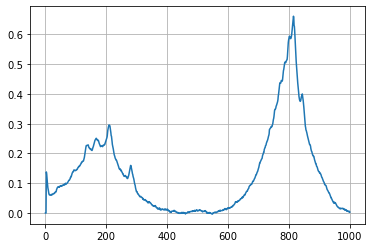

In [15]:
test =fft(np.array(df['Saturated Absorption']))
plt.plot(df['Saturated Absorption'])
plt.grid()



In [57]:
# Apply Filter
N = buttord(.1,.16,.11,2)
print(N)
Wn = 0.1
rs = 5
a,b= butter(N[0],N[1])
filtered= lfilter(a,b,df['Saturated Absorption'])


(4, 0.15617655978261058)


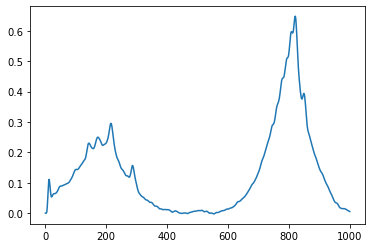

In [58]:
plt.plot(filtered)

950
30


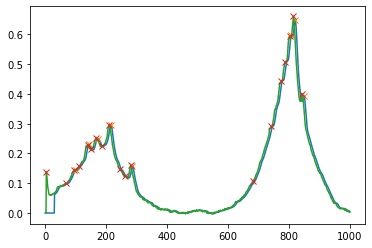

In [59]:
#Find Peaks
for i in range(30):
    filtered[i] = 0
peaks, properties = find_peaks(filtered, height=0.10)
peaks_fitted, properties = find_peaks(df['Saturated Absorption'], prominence=(None,0.1),height=0.10,wlen=11,distance=8)
plt.plot(filtered)
plt.plot(peaks,filtered[peaks],'x')
c = filtered[::-1]
print(len(c)-np.argmax(c>0.04))
print(np.argmax(filtered>0.04))



plt.plot(df['Saturated Absorption'])
plt.plot(peaks_fitted,df['Saturated Absorption'][peaks_fitted],'x')

In [60]:
fingers = peaks[0:5]

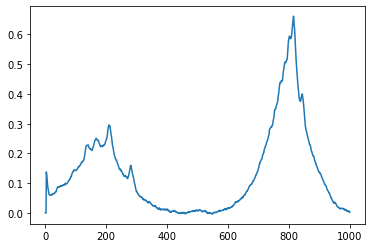

In [61]:
plt.plot(df['Saturated Absorption'])

In [62]:
attempts = []
for i in range(len(peaks)%5):
   attempts.append(peaks[i:(5+i)])
attempts = np.array(attempts)

In [39]:
print(attempts)

[[101 143 172 215 286]
 [143 172 215 286 808]
 [172 215 286 808 821]]


In [65]:
thumbs = attempts[:,-1]

In [89]:
N = buttord(.1,.12,.11,2)

a,b= butter(N[0],N[1])

x = (lfilter(a,b,df['Error']))

In [114]:
peaks_error, properties_error = find_peaks(x, prominence=(None,0.3),height=0.10,wlen=100,distance=100)

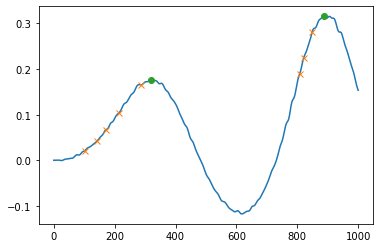

In [115]:
plt.plot(x)
plt.plot(peaks,x[peaks],'x')
plt.plot(peaks_error,x[peaks_error],'o')

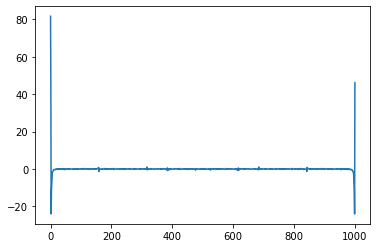